<a href="https://colab.research.google.com/github/nwudochika/nwudo-cj/blob/main/MACHINE_LEARNING_ASSIGNMENT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NWUDO CHIKAEZE FIDELIS JUNIOR
STUDENT NUMBER: 202290064

train a classifier using each of the following:

Decision Tree

Ensemble of trees

Random forest

MLP Neural Network

With 1 hidden layer

With 2 hidden layers

With 3 hidden layers

You may experiment with choosing the other hyper-parameters for these models, however, anything that makes the model converge and work is sufficient for this exercise.

Use cross-fold validation in order to evaluate the performance of each classifier on the dataset.

In [1]:
import numpy as np   
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix,classification_report
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn import metrics


In [2]:
# to apply a classifier on the dataset, we need to flattern the images.
digits = datasets.load_digits()
data = digits.images.reshape(digits.images.shape[0], -1)
print("Number of samples:", data.shape)

Number of samples: (1797, 64)


In [3]:
# split the data into 50% train and 50% test subset
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5)

#### Decision Tree Classifier

In [4]:
# Create a Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state=123)

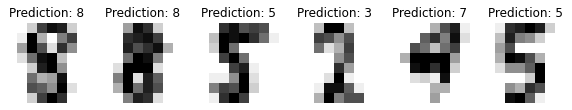

In [5]:
# learn the digits on the train subset
dt.fit(X_train,y_train)

# predict the value of the digit on the test subset
predicted = dt.predict(X_test)

# visualization of first 6 test samples and show their predicted digit value in the title
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

[[79  0  0  0  2  7  0  0  0  3]
 [ 0 70  1  0  1  2  1  6  7  4]
 [ 0  2 74  3  0  4  1  4  0  0]
 [ 0  2  1 58  1  0  2  1 13  4]
 [ 3  3  0  0 77  2  1  6  0  2]
 [ 0  0  0  4  4 82  2  1  0  2]
 [ 0  2  0  0  1  0 86  0  1  0]
 [ 0  1  0  0  0  2  1 80  3  0]
 [ 0  3  7  5  4  0  0  1 66  3]
 [ 0  1  1  8  1  4  0  1  7 68]]


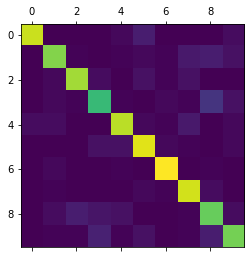

In [6]:
confusion_matrix = confusion_matrix(y_test, predicted)

print(confusion_matrix)

plt.matshow(confusion_matrix)

plt.show()

In [7]:
print(classification_report(y_test, predicted))

print("Accuracy", metrics.accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        91
           1       0.83      0.76      0.80        92
           2       0.88      0.84      0.86        88
           3       0.74      0.71      0.72        82
           4       0.85      0.82      0.83        94
           5       0.80      0.86      0.83        95
           6       0.91      0.96      0.93        90
           7       0.80      0.92      0.86        87
           8       0.68      0.74      0.71        89
           9       0.79      0.75      0.77        91

    accuracy                           0.82       899
   macro avg       0.82      0.82      0.82       899
weighted avg       0.83      0.82      0.82       899

Accuracy 0.8231368186874305


In [8]:
# Tuning hyperparameter with GridSearchCV
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth':range(1,30,2),'min_samples_split':range(10,500,25)}]
dt_grid = GridSearchCV(dt,tree_param,cv=5,n_jobs=-1,verbose=2)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(1, 30, 2),
                          'min_samples_split': range(10, 500, 25)}],
             verbose=2)

In [9]:

# selection of best parameters
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10}

In [10]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, min_samples_split = 10, random_state = 100)

In [11]:
scores = cross_val_score(DT, data, digits.target, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.80833333 0.76388889 0.83844011 0.82172702 0.7632312 ]
0.80 accuracy with a standard deviation of 0.03


#### Ensemble of Trees

In [12]:
# Bagging classifier helps in reducing the variance of individual estimators by introducing randomization
#into the training stage of each of the estimators and making an ensemble out of all the estimators. 

n_samples = data.shape[0]
n_features = data.shape[1]
bagging = BaggingClassifier(random_state=1, n_jobs=-1)
params = {'base_estimator': [None, KNeighborsClassifier(), DecisionTreeClassifier()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5, 1.0, n_samples//2, ],
          'max_features': [0.5, 1.0, n_features//2, ],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}
bagging_grid = GridSearchCV(bagging, params, cv=3, n_jobs=-1,verbose=1)
history = bagging_grid.fit(X_train,y_train)
bagging_grid.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


{'base_estimator': KNeighborsClassifier(),
 'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 50}

In [13]:
BC = BaggingClassifier(KNeighborsClassifier(), bootstrap = True, bootstrap_features = True, max_features=1.0, max_samples=1.0,
                       n_estimators=50)
scor = cross_val_score(BC, data, digits.target, cv=5, n_jobs=-1)
print(scor)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scor.mean(), scor.std()))

[0.95277778 0.93888889 0.97214485 0.97493036 0.9637883 ]
0.96 accuracy with a standard deviation of 0.01


#### Random Forest

In [14]:
rf = RandomForestClassifier()


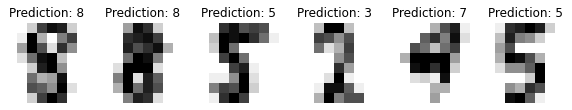

In [15]:
# learn the digits on the train subset
rf.fit(X_train,y_train)

# predict the value of the digit on the test subset
pred = rf.predict(X_test)

# visualization of first 6 test samples and show their predicted digit value in the title
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, pred in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {pred}")

In [16]:
# Tuning hyperparameters with GridSearchCV
param_dist = {"n_estimators": [10,50,100],
              "max_depth": [3, None],
              "max_features": ["sqrt"],
              "min_samples_split": [2,11],
              "min_samples_leaf": [1,11],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]} 
r_cl = GridSearchCV(rf, param_dist, n_jobs=-1,cv=3, verbose=True)
r_cl.fit(X_train,y_train)
r_cl.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [17]:
RF = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=None, max_features="sqrt", min_samples_leaf=1,
                           min_samples_split=2,n_estimators=50)


In [18]:
score = cross_val_score(RF, data, digits.target, cv=5)
print(score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

[0.93333333 0.91388889 0.96100279 0.96657382 0.9275766 ]
0.94 accuracy with a standard deviation of 0.02


#### MLP Neural Network

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_shape=(64,), activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
26/26 [==============================] - 3s 14ms/step - loss: 10.4397 - accuracy: 0.1906 - val_loss: 8.3057 - val_accuracy: 0.1444
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 6.2351 - accuracy: 0.1844 - val_loss: 5.9451 - val_accuracy: 0.2000
Epoch 3/50
26/26 [==============================] - 0s 3ms/step - loss: 4.4968 - accuracy: 0.2475 - val_loss: 4.5549 - val_accuracy: 0.2444
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 3.2628 - accuracy: 0.3391 - val_loss: 3.3448 - val_accuracy: 0.2778
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 2.4016 - accuracy: 0.4406 - val_loss: 2.4905 - val_accuracy: 0.3778
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 1.8023 - accuracy: 0.5322 - val_loss: 1.9114 - val_accuracy: 0.5333
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 1.4086 - accuracy: 0.6200 - val_loss: 1.5183 - val_accuracy: 0.6222
Epoch 8/50
26/26 [

We realise that at epoch 40, it attained its peak and later dropped and finally attained convergence at epoch 43

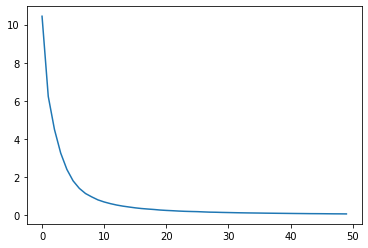

In [21]:
plt.plot(history.history['loss'])

In [22]:
loss, acc = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy:", acc)

29/29 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9266
Test loss: 0.23794865608215332
Test Accuracy: 0.9265850782394409


In [23]:
# Two hidden layers

model2 = Sequential()
model2.add(Dense(128, input_shape=(64,), activation="relu"))
model2.add(Dense(10,activation="softmax"))

model2.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
history2 = model2.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
26/26 [==============================] - 0s 8ms/step - loss: 2.9005 - accuracy: 0.3379 - val_loss: 1.0867 - val_accuracy: 0.6667
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.7921 - val_loss: 0.4317 - val_accuracy: 0.8444
Epoch 3/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.8936 - val_loss: 0.3122 - val_accuracy: 0.9111
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 0.9233 - val_loss: 0.2155 - val_accuracy: 0.9556
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.9418 - val_loss: 0.1973 - val_accuracy: 0.9333
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1566 - accuracy: 0.9455 - val_loss: 0.1968 - val_accuracy: 0.9556
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.9678 - val_loss: 0.1958 - val_accuracy: 0.9556
Epoch 8/50
26/26 [==

For two hidfden layers, it reached its peak of 1 val accuracy at epoch 39, and later dropped a little and attained convergence at epoch 40 with a score of 0.9889

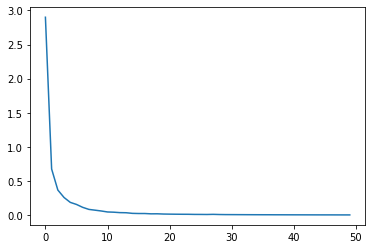

In [25]:
plt.plot(history2.history['loss'])

In [26]:
loss, acc = model2.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy:", acc)

29/29 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9689
Test loss: 0.1495773196220398
Test Accuracy: 0.9688543081283569


In [27]:
# Three hidden layers

model3 = Sequential()
model3.add(Dense(128, input_shape=(64,), activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(10,activation="softmax"))

model3.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 43,914
Trainable params: 43,914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
26/26 [==============================] - 1s 8ms/step - loss: 2.0299 - accuracy: 0.5099 - val_loss: 0.4390 - val_accuracy: 0.8222
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.9097 - val_loss: 0.1942 - val_accuracy: 0.9000
Epoch 3/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.9592 - val_loss: 0.1078 - val_accuracy: 0.9778
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9827 - val_loss: 0.1109 - val_accuracy: 0.9556
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9950 - val_loss: 0.0867 - val_accuracy: 0.9778
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9975 - val_loss: 0.0881 - val_accuracy: 0.9667
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9988 - val_loss: 0.0645 - val_accuracy: 0.9889
Epoch 8/50
26/26 [==

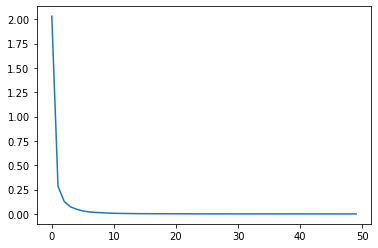

In [28]:
history3 = model3.fit(X_train, y_train, validation_split=0.1, epochs=50)
plt.plot(history3.history['loss'])

for three hidden layers, convergence was attained at epoch 3

In [29]:
loss, acc = model3.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy:", acc)

29/29 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9811
Test loss: 0.0840168371796608
Test Accuracy: 0.9810901284217834
